In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import cluster

%matplotlib inline
sns.set()
plt.style.use('ggplot')

In [20]:
df=pd.read_csv('lionairfilter-clenasing.csv',delimiter=',')
df

,Actor1CountryCode,NumMentions,NumSources,NumArticles,AvgTone,DATEADDED,SOURCEURL
0,unknown,6,1,6,-3.649635,20181101,http://en.tempo.co/read/news/2018/11/01/056923...
1,unknown,2,1,2,-3.617571,20181030,https://www.ibtimes.com/lion-air-crash-mystery...
2,unknown,6,1,6,-4.545455,20181105,https://www.efe.com/efe/english/portada/indone...
3,AUS,4,2,4,-3.583062,20181105,https://thewest.com.au/news/aviation/lion-air-...
4,AUS,12,2,12,-3.583062,20181105,https://thewest.com.au/news/aviation/lion-air-...
5,EUR,14,3,14,-3.844074,20181030,https://www.couriermail.com.au/travel/travel-n...
6,EUR,84,3,84,-3.844074,20181030,https://www.couriermail.com.au/travel/travel-n...
7,EUR,1,1,1,-3.857201,20181030,https://www.goldcoastbulletin.com.au/the-13-mi...
8,unknown,12,2,12,-4.324482,20181030,https://www.newshub.co.nz/home/travel/2018/10/...
9,IDN,1,1,1,-3.669725,20181030,https://newsinfo.inquirer.net/1048577/p2fb-wat...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 7 columns):
Actor1CountryCode    2004 non-null object
NumMentions          2004 non-null int64
NumSources           2004 non-null int64
NumArticles          2004 non-null int64
AvgTone              2004 non-null float64
DATEADDED            2004 non-null int64
SOURCEURL            2004 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 109.7+ KB


Text(0,0.5,'Average Tone')

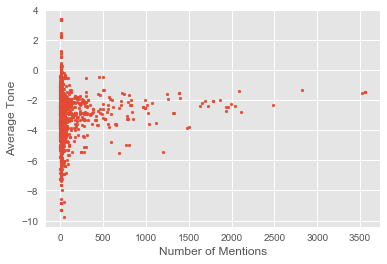

In [22]:
f1=df['NumMentions'].values
f2=df['AvgTone'].values
x=np.array(list(zip(f1,f2)))
plt.scatter(f1,f2,s=7)
plt.xlabel('Number of Mentions')
plt.ylabel('Average Tone')

In [23]:
df_2_vars=df.drop(['Actor1CountryCode','SOURCEURL','DATEADDED','NumArticles','NumSources'],axis=1)
data=df_2_vars.values
data


array([[ 6.        , -3.64963504],
       [ 2.        , -3.61757106],
       [ 6.        , -4.54545455],
       ...,
       [ 4.        , -2.97339593],
       [ 4.        , -3.61445783],
       [ 2.        , -5.45454545]])

In [24]:
data.shape

(2004, 2)

In [25]:
k=2
kmeans=cluster.KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
cluster.KMeans?

In [27]:
labels=kmeans.predict(data)
labels

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
centroids=kmeans.cluster_centers_
c_x=centroids[:,0]
c_y=centroids[:,1]
centroids

array([[  38.40666667,   -2.97578928],
       [1440.27777778,   -2.52039196]])

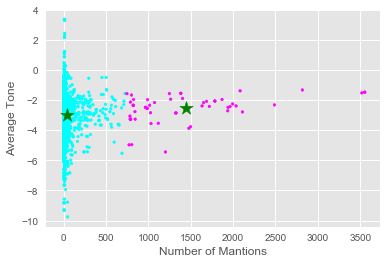

In [30]:
plt.xlabel('Number of Mantions')
plt.ylabel('Average Tone')
plt.scatter(f1,f2, c=labels,s=7,cmap=plt.cm.cool)
plt.scatter(c_x,c_y,marker='*',s=200,c='g')
plt.scatter?

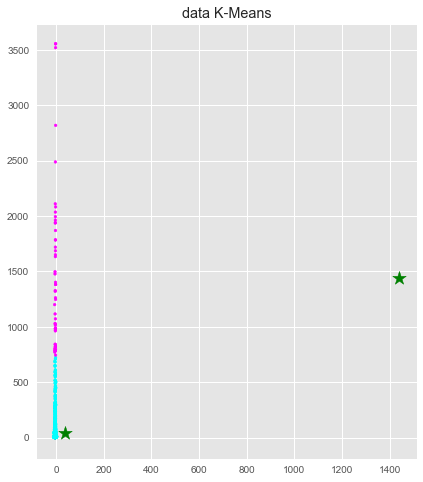

In [52]:
from sklearn.cluster import KMeans

#Predict K-Means cluster membership
km_data = KMeans(n_clusters=2, random_state=2).fit_predict(data)

plt.figure(figsize=(15,8))
plt.subplot(121, title='data K-Means')
plt.scatter(f1,f2, c=labels,s=7,cmap=plt.cm.cool)
plt.scatter(c_x,c_y,marker='*',s=200,c='g')